Project Topic:
This project looks at IQ levels in different countries and examines whether IQ is dependent on education expenditure or average income. The purpose of this is to determine whether or not income inequality exists with regards to intelligence.

Data:
This data was gathered from Kaggle at this link: https://www.kaggle.com/datasets/abhijitdahatonde/worldwide-average-iq-levels
108 rows (countries) and 6 columns describing countries' IQ rankings along with other related and unrelated statistics.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm



iq = pd.read_csv('IQ_level.csv')
iq.info()
display(iq)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1
...,...,...,...,...,...,...
103,104,Equatorial Guinea,56,NaN,7625.0,29.9
104,105,Gambia,55,14.0,648.0,32.9
105,106,Guatemala,55,92.0,2830.0,32.1
106,107,Sierra Leone,52,16.0,412.0,30.4


Data Cleaning:
The data is pretty clean aside from some NaNs, which we dropped here.

In [2]:
iq = iq.dropna()
display(iq)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
4,5,China,104,183.0,4654.0,19.1
5,6,South Korea,103,1024.0,22805.0,18.2
...,...,...,...,...,...,...
102,103,Ivory Coast,61,69.0,1289.0,32.2
104,105,Gambia,55,14.0,648.0,32.9
105,106,Guatemala,55,92.0,2830.0,32.1
106,107,Sierra Leone,52,16.0,412.0,30.4


In [3]:
# plt.figure(figsize=(15, 13))
# sns.heatmap(cc.corr(), annot = False, cmap="coolwarm")
# plt.plot()

In [4]:
# plt.figure(figsize=(15, 13))
# sns.pairplot(cc.iloc[: , : 31].corr())
# plt.plot()

education_expenditure


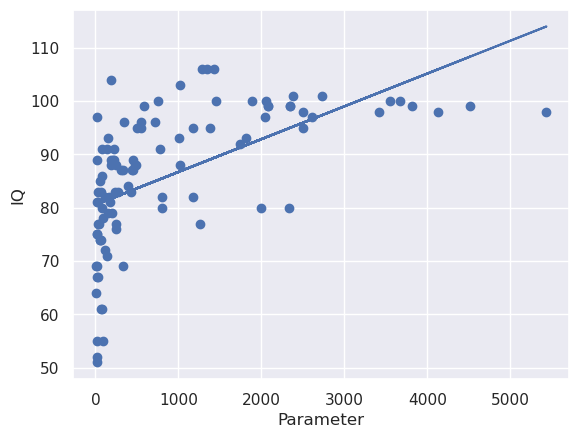

avg_income


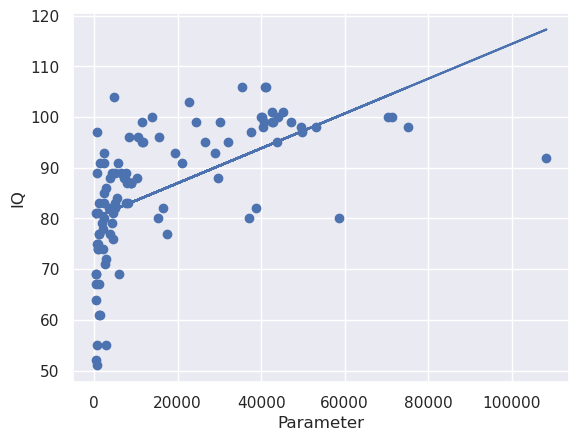

avg_temp


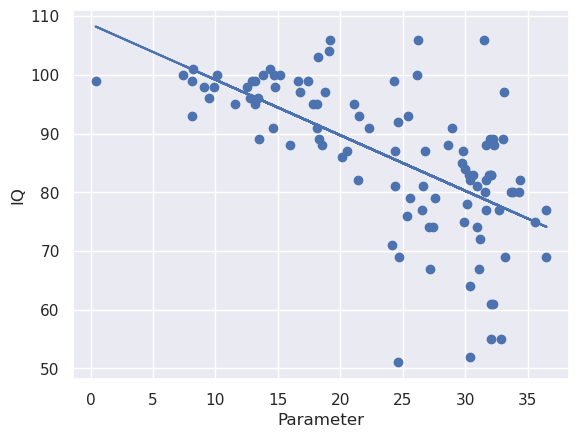

avg_temp is the best predictor with an rsquared of 0.3968715268909445


In [5]:
rs = []
cols = []
for col in iq:
    if col != 'rank' and col != 'country' and col != 'IQ':
        formula = 'IQ ~ ' + col
        model = smf.ols(formula=formula, data=iq).fit()
        rs.append(model.rsquared_adj)
        cols.append(col)
        i = model.params['Intercept']
        m = model.params[col]
        xval = iq[col]
        print(col)
        yval = iq['IQ']
        plt.plot(xval, i + m * xval)
        plt.scatter(x = xval, y = yval)
        plt.xlabel('Parameter')
        plt.ylabel('IQ')
        plt.show()

x = rs.index(max(rs))
print(cols[x], 'is the best predictor with an rsquared of', rs[x])

EDA:
Our RSquared value leads us to believe that the average temperature is more of a factor than average expenditure and average income on IQ. This is an example of correlation not meaning causation, and shows us that money doesn't play a large role in IQ.

In [6]:
train_IQ, test_IQ = train_test_split(iq, test_size=0.5, random_state = 0)

In [7]:
kcols = ['education_expenditure', 'avg_temp', 'avg_income']
best = ['',0]
for p in kcols:
    model  = smf.ols(formula='IQ~'+p, data=train_IQ).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

accepted_factors = []
accepted_factors.append('avg_temp')
kcols.remove('avg_temp')
train_iq1 = smf.ols(formula='IQ~avg_temp', data=train_IQ).fit()

education_expenditure 0.32548485807605687
avg_temp 0.47054021242457456
avg_income 0.4201127420955356
best: ['avg_temp', 0.47054021242457456]


In [8]:
best = ['',0]
for p in kcols:
    model  = smf.ols(formula='IQ~'+p, data=train_IQ).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

accepted_factors.append('avg_income')
kcols.remove('avg_income')
train_iq2 = smf.ols(formula='IQ~avg_temp + avg_income', data=train_IQ).fit()

education_expenditure 0.32548485807605687
avg_income 0.4201127420955356
best: ['avg_income', 0.4201127420955356]


In [9]:
best = ['',0]
for p in kcols:
    model  = smf.ols(formula='IQ~'+p, data=train_IQ).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

accepted_factors.append('education_expenditure')
kcols.remove('education_expenditure')
train_iq3 = smf.ols(formula='IQ~avg_temp + avg_income + education_expenditure', data=train_IQ).fit()

education_expenditure 0.32548485807605687
best: ['education_expenditure', 0.32548485807605687]


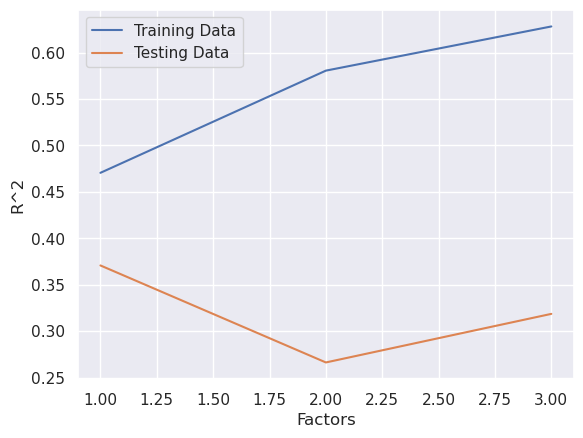

In [10]:
x = [1, 2, 3]
adjr2_train = [train_iq1.rsquared, train_iq2.rsquared, train_iq3.rsquared]
plt.plot(x, adjr2_train, label = "Training Data")
adjr2_test = []
for p in accepted_factors:
    model  = smf.ols(formula='IQ~'+p, data=test_IQ).fit()
    adjr2_test.append(model.rsquared)
plt.plot(x, adjr2_test, label = "Testing Data")
plt.ylabel('R^2')
plt.xlabel('Factors')
plt.legend()
plt.show()

Data: This data was gathered from Kaggle at this link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set 768 rows (people) and 9 columns describing people as having or not having diabetes along with other related and unrelated statistics.

In [11]:
h = pd.read_csv('diabetes.csv')
h.info()
display(h)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
h = h.dropna()
display(h)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
params = h.drop(labels = "Outcome", axis = 'columns')
x_train, x_test = train_test_split(params, test_size=0.25, shuffle = False)
y_train, y_test = train_test_split(h['Outcome'], test_size=0.25, shuffle = False)

In [14]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)
LogReg.coef_

array([[ 1.22874061e-01,  2.36546423e-02, -1.64581420e-02,
        -1.77262673e-03, -1.92178079e-04,  6.20266829e-02,
         6.75425637e-01, -8.72414589e-04]])

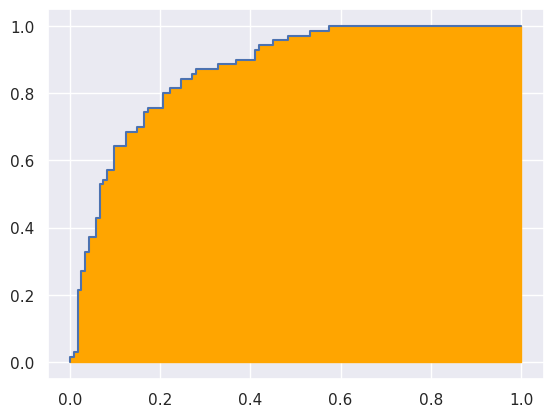

In [15]:
pp = LogReg.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, pp)
fpr, tpr, thresholds = roc_curve(y_test, pp)
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color = 'orange')
plt.show()

In [16]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    y =0 
    if np.isscalar(x):
      x = np.array(x).reshape((1,1))
    if np.isscalar(w):
      w = np.array(w).reshape((1,1))
    if np.isscalar(b):
      b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
      b= b.reshape((1,1))  

    z = np.dot(x, w.T) + b
    y = 1 / (1 + np.exp(-z))
    
    print(y.reshape(y.shape[0],))
    return y.reshape(y.shape[0],)

In [17]:
w = LogReg.coef_
x = x_test
b = LogReg.intercept_
y_pred = gen_logistic(x, w, b)

[0.34861517 0.42343888 0.481193   0.71606953 0.42872678 0.23268529
 0.41281816 0.36587585 0.39331627 0.10909196 0.58801134 0.19747576
 0.66784442 0.13067842 0.70527376 0.24921541 0.35469282 0.27334734
 0.43723797 0.58023197 0.12954833 0.22072108 0.54149971 0.19250312
 0.1177433  0.36408327 0.16802828 0.62547944 0.82548007 0.35928466
 0.76164505 0.08317695 0.42989966 0.12922674 0.24469399 0.67343556
 0.72631666 0.33207708 0.68055744 0.15031452 0.20508354 0.05061707
 0.4488774  0.44007771 0.22414196 0.20092615 0.86500467 0.22723453
 0.19880755 0.18187519 0.16122278 0.26033138 0.35204285 0.12788903
 0.38414214 0.13953716 0.19480565 0.16250606 0.25675461 0.48722837
 0.19226997 0.16973491 0.4469867  0.06826473 0.12681664 0.38668721
 0.41690467 0.40189277 0.1945684  0.49087585 0.35031105 0.69209383
 0.4635027  0.12639707 0.10760124 0.28696336 0.34365397 0.26932172
 0.17667164 0.57585266 0.10899244 0.38780717 0.49359006 0.20977513
 0.58238073 0.87508531 0.58157559 0.67240097 0.37333838 0.1816

In [18]:
count_true = 0
count_pred = 0
for i in range(576, 767):
    if y_pred[i - 576] >= .5:
        count_pred += 1
        if y_test[i] >= .5:
            count_true += 1
precision = count_true/count_pred
print(precision)

0.8181818181818182


In [19]:
count_true = 0
count_pred = 0
for i in range(576, 767):
    if y_test[i] >= .5:
        count_true += 1
        if y_pred[i - 576] >= .5:
            count_pred += 1

recall = count_pred/count_true
print(recall)

0.5142857142857142


Conclusion:
This project examined different areas of human health, from mental acuity with IQ to physical upkeep with diabetes. The investigation utilized two datasets, the first with 768 people and corresponding statistics, and the second comprising 108 countries, with corresponding statistics on these variables. However, after data cleaning, which included the removal of entries with missing values, 103 countries remained for analysis.
The results showed that average temperature might have a stronger connection to IQ levels than education spending or income. This was surprising and suggests that factors like climate could impact IQ. However, it's important to remember that just because two things are linked statistically, it doesn't mean one causes the other.
We also looked at diabetes data, using logistic regression to predict diabetes based on health factors. The model was pretty good at predicting diabetes, with a precision of about 82%. This means it was accurate in identifying people with diabetes most of the time. However, it only identified about half of the actual diabetes cases, showing there's room for improvement.
In summary, the project shows how complex factors like intelligence and health are influenced by various elements, including unexpected ones like climate. It also highlights the potential and limits of using statistical models to understand these complex traits. These findings encourage more research into how different factors, both expected and unexpected, affect intelligence and health.